# Transcending Scales

In [6]:
from brian2 import *

import numpy as np

## Single Neuron Transfer Property
### Single Neuron Current Injection

In [22]:
start_scope() #Ignore brian objects created prior to this command

# neuronal parameters
N = 1 # total number of neurons
vth = -55*mV# threshold potential
vr = -70*mV# reset potential
vl = -70*mV
tau = 10.0*ms # membrane time constant
Cm = 250*pF

#Equations are assigned as strings
eqs_neuron_LIFI='''
inp : amp
dv/dt = -(v-vl)/tau + inp/Cm : volt
'''

Ee = 0*mV
Ei = -85*mV
gl = 17*nS
Ge = 2*nS
Gi = -2*nS 
eqs_neuron_LIFC='''
inp : amp
dv/dt = (-gl*(v-vl) + Ge*ge*(Ee-vl) + Gi*gi*(Ei-vl) + inp)/Cm: volt
dge/dt = -ge*(1./tau) : 1
dgi/dt = -gi*(1./tau) : 1
'''

In [15]:
# Single Neuron
P=NeuronGroup(N=N,model=eqs_neuron_LIFI,threshold='v>=vth',reset='v=vr',refractory=2*ms,method='euler')

# Devices
sm = SpikeMonitor(P) # Record spike times
sr = PopulationRateMonitor(P) #Record rate of population activity
sm_vm = StateMonitor(P,'v',record=range(N)) # Record State Variables like Vm

store('initialized')
T = 100

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


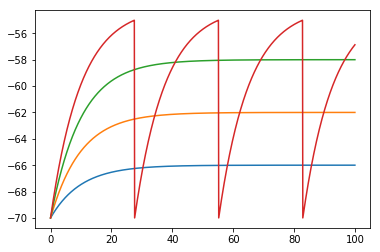

In [16]:
# Rheobase
vs = []
for i in np.arange(0.1,0.5,0.1):
    # Simulation
    restore('initialized')

    P.v = vl#initial value
    P.inp = i*namp #input

    run(T*ms, report='text');
    
    # Store data
    vs.append(sm_vm.v/mV)
ts = sm_vm.t/ms

for vv in vs:
    plt.plot(ts, transpose(vv))
plt.xlabel('Current Injection [pamp]')
plt.ylabel('Firing Rate [Hz]')

In [18]:
# F-I curve
es = []
ins = np.arange(0,2.5,0.1)
for i in ins:
    # Simulation
    restore('initialized')

    P.v = vl#initial value
    P.inp = i*namp #input

    run(T*ms);
    
    # Store data
    es.append(sm.t/ms)
    
# plt.eventplot(es);

Text(0,0.5,'Firing Rate [Hz]')

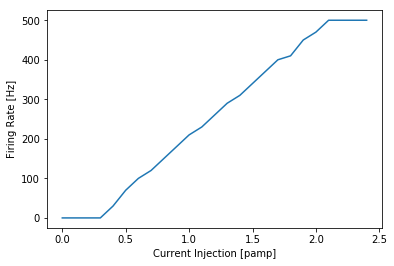

In [19]:
cnts = [len(ee)*1000/T for ee in es]
plt.plot(ins, cnts)
plt.xlabel('Current Injection [pamp]')
plt.ylabel('Firing Rate [Hz]')

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


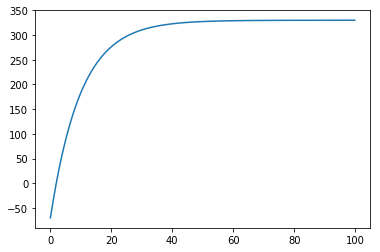

In [23]:
# Free-state Dynamic
# Single Neuron
vf = 1e9*mV
Pf=NeuronGroup(N=N,model=eqs_neuron_LIFI,threshold='v>=vf',reset='v=vr',refractory=2*ms,method='euler')

# Devices
sm_vmf = StateMonitor(Pf,'v',record=range(N)) # Record State Variables like Vm

Pf.v = vl#initial value
Pf.inp = 10*namp #input

run(100*ms, report='text');

# Plot
figure()
plot(sm_vmf.t/ms,transpose(sm_vmf.v/mV));

## Single Neuron Spike Input

In [368]:
start_scope() #Ignore brian objects created prior to this command

# neuronal parameters
vth = -55*mV# threshold potential
vr = -70*mV# reset potential
vl = -70*mV
tau = 20.0*ms # membrane time constant
tau_syn = 5*ms
Cm = 250*pF

#Equations are assigned as strings
imax = 1*nA
imin = -1*nA
eqs_neuron_LIFI='''
dv/dt = -(v-vl)/tau + inp/Cm : volt
dinp/dt = -inp/tau_syn : amp
'''

Ee = 0*mV
Ei = -85*mV
gl = 17*nS
Ge = 4*nS
Gi = -4*nS 
eqs_neuron_LIFC='''
dv/dt = (-gl*(v-vl) + Ge*ge*(Ee-vl) + Gi*gi*(Ei-vl))/Cm: volt
dge/dt = -ge*(1./tau_syn) : 1
dgi/dt = -gi*(1./tau_syn) : 1
'''

In [369]:
# T = 1000*ms
# Pe = PoissonGroup(1,1*Hz)
# Ntest = NeuronGroup(N=1,model=eqs_neuron_LIFC,threshold='v>=vth',reset='v=vr',refractory=2*ms,method='euler')
# Se = Synapses(Pe, Ntest, on_pre='ge=Ge/nS')
# # Se = Synapses(Pe, Ntest, on_pre='inp=imax')
# Se.connect(j='i')

# # Devices
# sm = SpikeMonitor(Ntest) # Record spike times
# sr = PopulationRateMonitor(Ntest) #Record rate of population activity
# sm_vm = StateMonitor(Ntest,'v',record=range(1)) # Record State Variables like Vm

# Ntest.v = vl#initial value
# run(T, report='text');
# figure()
# plot(sm_vm.t/ms,transpose(sm_vm.v/mV));

In [373]:
# Single Neuron
N = 100
Pe = PoissonGroup(N, np.arange(0,10*N,10)*Hz + 10*Hz)
Pi = PoissonGroup(N, np.arange(0,10*N,10)*Hz + 10*Hz)
P = NeuronGroup(N=N,model=eqs_neuron_LIFC,threshold='v>=vth',reset='v=vr',refractory=2*ms,method='euler')
Se = Synapses(Pe, P, on_pre='ge=Ge/nS')
Si = Synapses(Pi, P, on_pre='gi=Gi/nS')
# Se = Synapses(Pe, P, on_pre='inp=imax')
Se.connect(j='i')
# Si = Synapses(Pi, P, on_pre='inp=imin')
Si.connect(j='i')

# Devices
sm = SpikeMonitor(P) # Record spike times
sr = PopulationRateMonitor(P) #Record rate of population activity
sm_vm = StateMonitor(P,'v',record=range(N)) # Record State Variables like Vm

store('initialized')

Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 1s


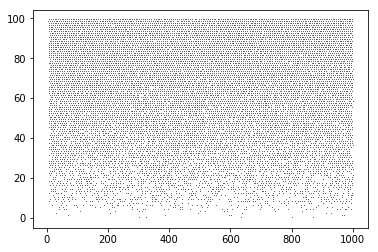

In [374]:
restore('initialized')
P.v = vl#initial value
run(T, report='text');

# Plot
figure()
plot(sm.t/ms,sm.i,',');
# figure()
# plot(sm_vm.t/ms,transpose(sm_vm.v/mV));

Text(0,0.5,'Firing Rate [Hz]')

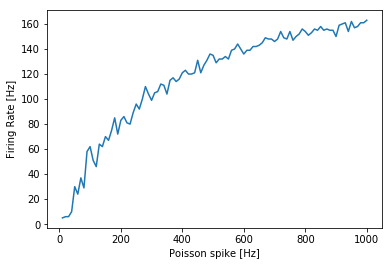

In [375]:
sp = sm.t/ms
ff = np.arange(0,10*N,10)+10
unique, counts = numpy.unique(sm.i, return_counts=True)
plt.plot(ff,counts)
plt.xlabel('Poisson spike [Hz]')
plt.ylabel('Firing Rate [Hz]')

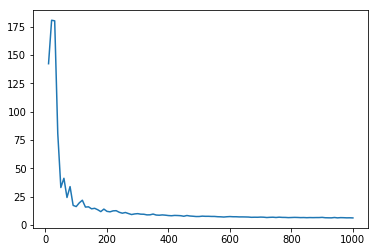

In [376]:
idxs = [np.where(sm.i==i)[0] for i in range(N)]
spks = [sp[idx] for idx in idxs]
itvs = [np.diff(spk) for spk in spks]
means = [np.mean(itv) for itv in itvs]
plot(ff,means)

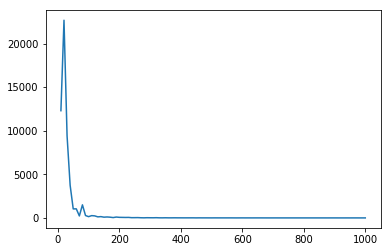

In [377]:
varis = [np.var(itv) for itv in itvs]
plot(ff,varis)

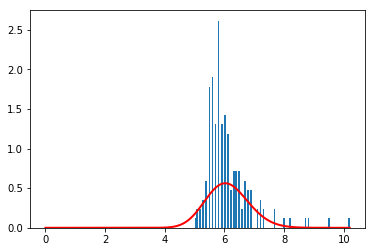

In [378]:
import scipy.stats as stats

itv = itvs[-1]

# the bins should be of integer width, because poisson is an integer distribution
entries, bin_edges, patches = plt.hist(itv, bins=100, normed=True)

# fit with curve_fit
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(itv,floc=0)

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, np.max(itv), 1000)

plt.plot(x_plot, stats.gamma.pdf(x_plot, fit_alpha, fit_loc, fit_beta), 'r-', lw=2)

## Network Neurons

In [8]:
start_scope() #Ignore brian objects created prior to this command

# neuronal parameters
vth = -55*mV# threshold potential
vr = -70*mV# reset potential
vl = -70*mV
tau = 10.0*ms # membrane time constant
tau_syn = 2*ms
Cm = 250*pF

#Equations are assigned as strings
imax = 0.03*nA
imin = -0.03*nA
eqs_neuron_LIFI='''
dv/dt = -(v-vl)/tau + inp/Cm : volt
dinp/dt = -inp/tau_syn : amp
'''

Ee = 0*mV
Ei = -85*mV
gl = 17*nS
Ge = 2*nS
Gi = -2*nS 
eqs_neuron_LIFC='''
dv/dt = (-gl*(v-vl) + Ge*ge*(Ee-vl) + Gi*gi*(Ei-vl))/Cm: volt
dge/dt = -ge*(1./tau_syn) : 1
dgi/dt = -gi*(1./tau_syn) : 1
'''

In [24]:
# repotaire
N = 5000
P = NeuronGroup(N=N,model=eqs_neuron_LIFI,threshold='v>=vth',reset='v=vr',refractory=2*ms,method='euler')

# devices
sm = SpikeMonitor(P)
sr = PopulationRateMonitor(P)
sm_vm = StateMonitor(P,'v',record=range(N))

# synaptic parameters
g = 1# gain of inhibition
J = 0.1*mV # synaptic weight
p = 0.1 # connection probability
delay = 1.5*ms # synaptic delay

# recurrent synapses
con = Synapses(P,P,on_pre='inp+=g*imin',method='euler') # Creating recurrent synapses within Neuron Group P 
con.connect(condition='i!=j',p=p) #You can also define specfic connectivity i=[indices of pre-synaptic neurons], j=[indices of post-synaptic neurons]
con.delay = delay # synaptic delay

# input parameters
inpfactor = 1 # Controls the external excitatory drive
nu_theta = abs(vth)/(p*N*J*tau) 
Pinp = PoissonGroup(N=N,rates=inpfactor*nu_theta)
con_ext = Synapses(Pinp, P, on_pre='v+=J')
con_ext.connect(True, p=p)
con_ext.delay = delay
store('init')

In [25]:
T = 100
restore('init')
# P.v = vth*uniform(size=N)#initial value
P.v = vl#initial value
run(T*ms, report='text')

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


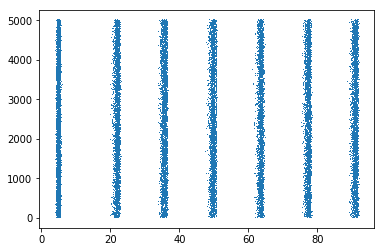

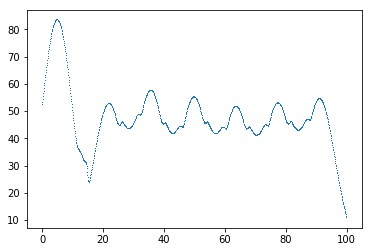

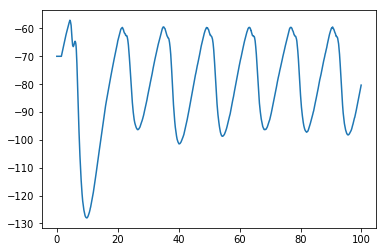

In [26]:
# Plot
figure()
plot(sm.t/ms,sm.i,',');
figure()
plot(sr.t/ms,sr.smooth_rate(width=5*ms)/Hz,',');
figure()
plot(sm_vm.t/ms,np.mean(transpose(sm_vm.v/mV),axis=1));

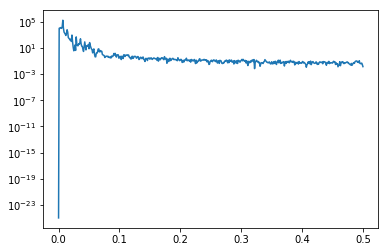

In [27]:
import scipy.signal as signal
vs = np.mean(transpose(sm_vm.v/mV),axis=1)
f, Pxx_den = signal.periodogram(vs)
plt.semilogy(f, Pxx_den)